In [1]:
import pandas as pd
BatteryLife = pd.read_csv('C:\\Users\\user\\Downloads\\scenario_3_20221024.csv',header=0,usecols=["vhcle_model", "pwrer_usqnt","bttr_capa"])
BatteryLife

,pwrer_usqnt,vhcle_model,bttr_capa
0,108.00,ELEC-CITY-326,256
1,90.72,ELEC-CITY-326,256
2,76.81,ELEC-CITY-326,256
3,90.78,ELEC-CITY-326,256
4,29.10,ELEC-CITY-326,256
...,...,...,...
222158,7.36,EBus-12,324
222159,2.59,ELEC-CITY-326,256
222160,1.38,ELEC-CITY-326,256
222161,0.48,ELEC-CITY-326,256


In [2]:
BatteryLife.shape

(222163, 3)

In [3]:
BatteryLife.info

<bound method DataFrame.info of         pwrer_usqnt    vhcle_model  bttr_capa
0            108.00  ELEC-CITY-326        256
1             90.72  ELEC-CITY-326        256
2             76.81  ELEC-CITY-326        256
3             90.78  ELEC-CITY-326        256
4             29.10  ELEC-CITY-326        256
...             ...            ...        ...
222158         7.36        EBus-12        324
222159         2.59  ELEC-CITY-326        256
222160         1.38  ELEC-CITY-326        256
222161         0.48  ELEC-CITY-326        256
222162        29.37  ELEC-CITY-326        256

[222163 rows x 3 columns]>

In [4]:
BatteryLife['vhcle_model'].unique()

array(['ELEC-CITY-326', 'EBus-12', 'APOLLO-1100-257', 'E-FIBIRD-272',
       'NEW-HYPERS', 'VBUS90-234', 'E-SKY-267', 'VOLTON', 'COUNTY-ELEC-T'],
      dtype=object)

In [5]:
mean=BatteryLife.groupby('vhcle_model').mean()
mean

,pwrer_usqnt,bttr_capa
vhcle_model,,
APOLLO-1100-257,30.303032,257.0
COUNTY-ELEC-T,24.125511,128.0
E-FIBIRD-272,29.358170,272.0
E-SKY-267,26.035152,267.0
EBus-12,43.990554,324.0
ELEC-CITY-326,39.553004,256.0
NEW-HYPERS,31.938649,201.0
VBUS90-234,33.333727,234.0
VOLTON,110.645887,0.0


In [6]:
median=BatteryLife.groupby('vhcle_model').median()
median.reset_index(inplace=True)
median

,vhcle_model,pwrer_usqnt,bttr_capa
0,APOLLO-1100-257,25.48,257.0
1,COUNTY-ELEC-T,23.42,128.0
2,E-FIBIRD-272,22.16,272.0
3,E-SKY-267,24.32,267.0
4,EBus-12,29.43,324.0
5,ELEC-CITY-326,32.16,256.0
6,NEW-HYPERS,31.08,201.0
7,VBUS90-234,29.92,234.0
8,VOLTON,108.40,0.0


In [7]:
mean.reset_index(inplace=True)

In [8]:
mean['충전전력량 백분율(평균)']=None

In [9]:
median['충전전력량 백분율(중앙값)']=None

In [10]:
#배터리 용량 0인 모델 날리기
mean.drop(mean[mean['bttr_capa']==0].index,inplace=True)
mean

,vhcle_model,pwrer_usqnt,bttr_capa,충전전력량 백분율(평균)
0,APOLLO-1100-257,30.303032,257.0,None
1,COUNTY-ELEC-T,24.125511,128.0,None
2,E-FIBIRD-272,29.358170,272.0,None
3,E-SKY-267,26.035152,267.0,None
4,EBus-12,43.990554,324.0,None
5,ELEC-CITY-326,39.553004,256.0,None
6,NEW-HYPERS,31.938649,201.0,None
7,VBUS90-234,33.333727,234.0,None


In [11]:
#배터리 용량 0인 모델 날리기
median.drop(median[median['bttr_capa']==0].index,inplace=True)

In [12]:
for idx in mean.index:
    mean.loc[idx,'충전전력량 백분율(평균)']=mean.loc[idx,'pwrer_usqnt']/mean.loc[idx,'bttr_capa']*100
mean

,vhcle_model,pwrer_usqnt,bttr_capa,충전전력량 백분율(평균)
0,APOLLO-1100-257,30.303032,257.0,11.791063
1,COUNTY-ELEC-T,24.125511,128.0,18.848056
2,E-FIBIRD-272,29.358170,272.0,10.793445
3,E-SKY-267,26.035152,267.0,9.750993
4,EBus-12,43.990554,324.0,13.577331
5,ELEC-CITY-326,39.553004,256.0,15.450392
6,NEW-HYPERS,31.938649,201.0,15.889875
7,VBUS90-234,33.333727,234.0,14.245183


In [13]:
for idx in median.index:
    median.loc[idx,'충전전력량 백분율(중앙값)']=median.loc[idx,'pwrer_usqnt']/median.loc[idx,'bttr_capa']*100

In [14]:
#필요없는 컬럼 날기기
mean.drop(columns=['pwrer_usqnt','bttr_capa'],axis=1,inplace=True)
mean

,vhcle_model,충전전력량 백분율(평균)
0,APOLLO-1100-257,11.791063
1,COUNTY-ELEC-T,18.848056
2,E-FIBIRD-272,10.793445
3,E-SKY-267,9.750993
4,EBus-12,13.577331
5,ELEC-CITY-326,15.450392
6,NEW-HYPERS,15.889875
7,VBUS90-234,14.245183


In [15]:
#필요없는 컬럼 날기기
median.drop(columns=['pwrer_usqnt','bttr_capa'],axis=1,inplace=True)
median

,vhcle_model,충전전력량 백분율(중앙값)
0,APOLLO-1100-257,9.914397
1,COUNTY-ELEC-T,18.296875
2,E-FIBIRD-272,8.147059
3,E-SKY-267,9.108614
4,EBus-12,9.083333
5,ELEC-CITY-326,12.5625
6,NEW-HYPERS,15.462687
7,VBUS90-234,12.786325


In [16]:
mean = mean.astype({'충전전력량 백분율(평균)':'float'})
mean

,vhcle_model,충전전력량 백분율(평균)
0,APOLLO-1100-257,11.791063
1,COUNTY-ELEC-T,18.848056
2,E-FIBIRD-272,10.793445
3,E-SKY-267,9.750993
4,EBus-12,13.577331
5,ELEC-CITY-326,15.450392
6,NEW-HYPERS,15.889875
7,VBUS90-234,14.245183


In [17]:
median = median.astype({'충전전력량 백분율(중앙값)':'float'})
median['충전전력량 백분율(중앙값)']= round(median['충전전력량 백분율(중앙값)'], 2)
median

,vhcle_model,충전전력량 백분율(중앙값)
0,APOLLO-1100-257,9.91
1,COUNTY-ELEC-T,18.30
2,E-FIBIRD-272,8.15
3,E-SKY-267,9.11
4,EBus-12,9.08
5,ELEC-CITY-326,12.56
6,NEW-HYPERS,15.46
7,VBUS90-234,12.79


In [18]:
mean['충전전력량 백분율(평균)']= round(mean['충전전력량 백분율(평균)'], 2)
mean

,vhcle_model,충전전력량 백분율(평균)
0,APOLLO-1100-257,11.79
1,COUNTY-ELEC-T,18.85
2,E-FIBIRD-272,10.79
3,E-SKY-267,9.75
4,EBus-12,13.58
5,ELEC-CITY-326,15.45
6,NEW-HYPERS,15.89
7,VBUS90-234,14.25


In [19]:
#컬럼명 변경
mean.rename(columns={'vhcle_model':'차량모델'},inplace=True)
mean

,차량모델,충전전력량 백분율(평균)
0,APOLLO-1100-257,11.79
1,COUNTY-ELEC-T,18.85
2,E-FIBIRD-272,10.79
3,E-SKY-267,9.75
4,EBus-12,13.58
5,ELEC-CITY-326,15.45
6,NEW-HYPERS,15.89
7,VBUS90-234,14.25


In [20]:
#컬럼명 변경
median.rename(columns={'vhcle_model':'차량모델'},inplace=True)
median

,차량모델,충전전력량 백분율(중앙값)
0,APOLLO-1100-257,9.91
1,COUNTY-ELEC-T,18.30
2,E-FIBIRD-272,8.15
3,E-SKY-267,9.11
4,EBus-12,9.08
5,ELEC-CITY-326,12.56
6,NEW-HYPERS,15.46
7,VBUS90-234,12.79


In [129]:
mean.to_excel('C:\\Users\\user\\Downloads\\모델별 배터리 수명 관리 효율 분석(평균).xlsx',index=False)

In [89]:
median.to_excel('C:\\Users\\user\\Downloads\\모델별 배터리 수명 관리 효율 분석(중앙값).xlsx',index=False)

In [21]:
차량모델=mean['차량모델'].to_list()
#list(mean['차량모델'])
충전전력량=mean['충전전력량 백분율(평균)'].to_list()

In [22]:
충전전력량_중앙값=median['충전전력량 백분율(중앙값)'].to_list()

c:\Users\user\anaconda3\envs\baek\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\baek\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\baek\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\baek\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\baek\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.prin

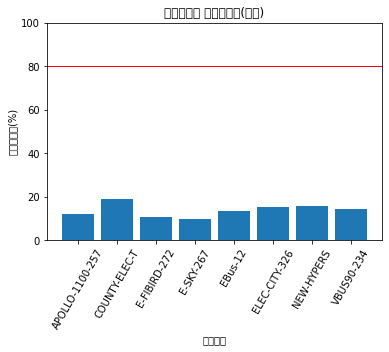

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(차량모델,충전전력량)
plt.xticks(rotation=60) #회전
#한글깨짐현상
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.xlabel('차량모델')
plt.ylabel('충전전력량(%)')
#y축 기준
plt.ylim([0, 100])
#수평 기준선
plt.axhline(y=80, color='r', linewidth=1)

plt.title('차량모델별 충전전력량(평균)')
plt.savefig('C:\\Users\\user\\Downloads\\충전전력량(평균).png' ,facecolor='#ffffff',bbox_inches='tight')
plt.show()


TypeError: show() got an unexpected keyword argument 'facecolor'

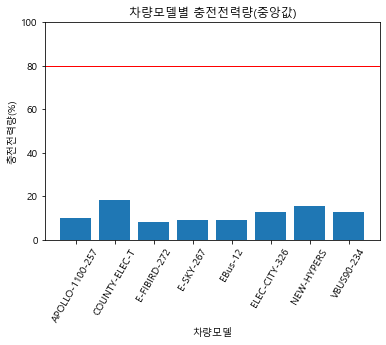

In [99]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(차량모델,충전전력량_중앙값)
plt.xticks(rotation=60) #회전
#한글깨짐현상
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.xlabel('차량모델')
plt.ylabel('충전전력량(%)')
#y축 기준
plt.ylim([0, 100])
#수평 기준선
plt.axhline(y=80, color='r', linewidth=1)
plt.title('차량모델별 충전전력량(중앙값)')
plt.savefig('C:\\Users\\user\\Downloads\\충전전력량(중앙값).png',facecolor='#ffffff',bbox_inches = 'tight')
plt.show()